# K-Means Clustering

Welcome to your next lab! In this assignment you will solve problem of clustering examples from given dataset using K-Means algorithm.

**You will learn to:**
- Build the general architecture of a learning algorithm:
    - KMeans Class
        - Initializing centroids
        - Finding closest centroid for each point
        - Finding optimal centroids
    - Finding optimal value of k
        - "Elbow" method

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [seaborn](https://seaborn.pydata.org/)  is a Python visualization library based on matplotlib which provides a high-level interface for drawing graphics.
- [JSAnimation](https://pypi.org/project/JSAnimation/) Javascript Animation exporter for matplotlib and IPython.
- [mpl_toolkits](https://matplotlib.org/mpl_toolkits/index.html) collections of application-specific functions that extend Matplotlib.

In [782]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from JSAnimation import IPython_display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**: 
In this lab we will work with some simple synthetic dataset to see how the algorithm works. Run following cells to generate dataset:

In [783]:
np.random.seed(37)
X = np.vstack(((np.random.randn(150, 2)  + np.array([3, 0])),
               (np.random.randn(100, 2)  + np.array([-3.5, 0.5])),
               (np.random.randn(100, 2) + np.array([-0.5, -2])),
               (np.random.randn(150, 2) + np.array([-2, -2.5])),
               (np.random.randn(150, 2) + np.array([-5.5, -3]))))

In [784]:
print('First five examples: ', X[:5])

First five examples:  [[ 2.94553639  0.67430807]
 [ 3.34664703 -1.30034617]
 [ 4.51851188  0.98982371]
 [ 3.2776809  -0.44858935]
 [ 3.96196624 -0.82757864]]


**Expected Output**: 

<table>
    <tr>
        <td> **First five examples: ** </td>
       <td> [[ 2.94553639  0.67430807]
 [ 3.34664703 -1.30034617]
 [ 4.51851188  0.98982371]
 [ 3.2776809  -0.44858935]
 [ 3.96196624 -0.82757864]]</td>
    </tr>
    
</table>

Our dataset represents 650 examples with 2 features:

In [785]:
print('X.shape:', X.shape)

X.shape: (650, 2)


**Expected Output**: 

<table>
    <tr>
        <td> **X.shape: ** </td>
       <td>(650, 2)
    </tr>
    
</table>

## 3 - Visualisation

Let's visualise our dataset to see how it looks like:

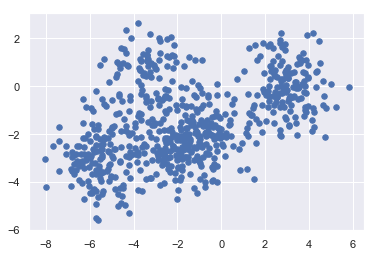

In [786]:
plt.scatter(X[:, 0], X[:, 1], s=30)
ax = plt.gca()

## 4 - K-Means. General Architecture

K-Means is a very simple algorithm which clusters the data into K number of clusters. The algorithm works as follows, assuming we have inputs $x_1,x_2,x_3,…,x_n$ and value of $k$:
1. Pick $k$ random points as cluster centers called centroids
2. Assign each $x_i$ to nearest cluster by calculating its distance to each centroid
3. Find new cluster center by taking the average of the assigned points
4. Repeat Step 2 and 3 until none of the cluster assignments change


**Step 1**

We randomly pick $k$ cluster centers(centroids). Let’s assume these are $c_1,c_2,…,c_k$, and we can say that:
$$c_1,c_2,…,c_k \epsilon  C,$$ is the set of all centroids.


**Step 2**

In this step we assign each input value to closest center. This is done by calculating squared Euclidian norm of the difference between the point and the each centroid:
$$\arg \min_{c_i \in C} ||x - c_i||^2.$$


**Step 3**

Finding the new centroid by taking the average of all the points assigned to that cluster:
$$c_i = \frac{1}{\lvert S_i \rvert}\sum_{x_i \in S_i} x_i,$$

$S_i$ is the set of all points assigned to the $i_{th}$ cluster.


**Step 4**

Repeating *Step 2* and *Step 3* until none of the cluster assignments change. That means until our clusters remain stable, we repeat the algorithm.

In [800]:
# GRADED CLASS: KMeans

class KMeans(object):
    """
    Parameters:
    -----------
    X -- np.array
        Matrix of input features
    k -- int
        Number of clusters
    """
    
    def __init__(self, X, k):
        self.X = X
        self.k = k
        
    def initialize_centroids(self):
        """ 
        Returns:
        
        Array of shape (k, n_features), 
            containing k centroids from the initial points
        """
        
        ### START CODE HERE ###
        # use shuffle with random state = 512, and pick first k points
        np.random.seed(512)
        np.random.shuffle(X)
        return X[:self.k]
        ### END CODE HERE ###
             
    def closest_centroid(self, centroids):
        """
        Returns:
        
        Array of shape (n_examples, ), 
            containing index of the nearest centroid for each point
        """
        
        ### START CODE HERE ###
        relation = []
        for x in X:
            mas = []
            for c in centroids:
                mas.append((np.linalg.norm(x - c))**2)
            np.array(relation.append(np.argmin(mas)))
        return relation
        ### END CODE HERE ###
    
    def move_centroids(self, centroids):
        """
        Returns:
        
        Array of shape (n_clusters, n_features),
        containing the new centroids assigned from the points closest to them
        """
        
        ### START CODE HERE ###
        closest_ind = self.closest_centroid(centroids)
        unique_clusters = np.zeros((self.k,3))
        new_centroids = []
        for x,c in zip(self.X, closest_ind):
            unique_clusters[c,0] += x[0]
            unique_clusters[c,1] += x[1]
            unique_clusters[c,2] += 1
        for i in unique_clusters:
            if i[2] == 0:
                i[2] = 1
            new_centroids.append([i[0]/i[2], i[0]/i[2]])
        return np.array(new_centroids)
        ### END CODE HERE ###
        

    def final_centroids(self):
        """
        Returns:
        
        clusters -- list of arrays, containing points of each cluster
        centroids -- array of shape (n_clusters, n_features),
            containing final centroids 
        
        """        
        ### START CODE HERE ###
        e = 10000000
        centroids = self.initialize_centroids()
        while(np.all(e > 0.0001)):
            relation_ind = self.closest_centroid(centroids)
            new_centroids = self.move_centroids(centroids)
            w = 0
            for i in range(self.k):
                w += centroids[i] - new_centroids[i]
            e = w/self.k
            centroids = new_centroids
        clusters = [ [] for i in range(self.k) ]
        for x,c in zip(self.X, relation_ind):
            clusters[c].append(x)
        ### END CODE HERE ###
        return clusters, centroids

** Initializing our model:**

In [801]:
model = KMeans(X, 3)

**Initializing centroids:**

In [804]:
centroids = model.initialize_centroids()
print('Random centroids:', centroids)

Random centroids: [[ 0.20593064 -1.95985346]
 [ 3.84584794  0.02838245]
 [-4.1549745  -0.56243633]]


**Expected Output**: 

<table>
    <tr>
        <td> **Random centroids: ** </td>
       <td> [[-1.40039209 -2.75287814]
 [-1.63504004 -2.59016237]
 [ 2.26881985  0.83999591]] </td>        
    </tr>
    
   
</table>

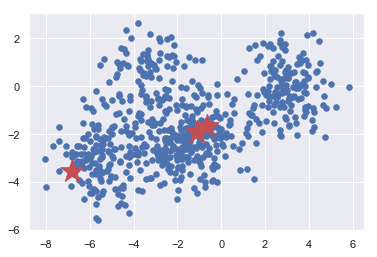

In [790]:
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.scatter(centroids[:,0], centroids[:,1], s=600, marker='*', c='r')
ax = plt.gca()

**Finding closest centroids:**

In [791]:
closest = model.closest_centroid(centroids)
print('Closest centroids:', closest[:10])

Closest centroids: [0, 1, 2, 1, 2, 2, 0, 1, 0, 2]


**Expected Output**: 

<table>
    <tr>
        <td> **Closest:** </td>
       <td>  [2 2 2 2 2 2 2 2 2 2] </td>        
    </tr>
    
   
</table>

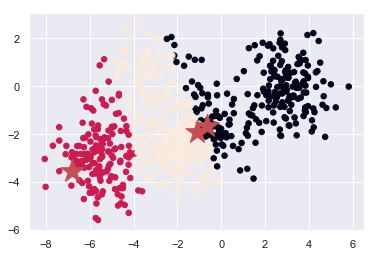

In [792]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=closest)
plt.scatter(centroids[:,0], centroids[:,1], s=600, marker='*', c='r')
ax = plt.gca()

**Move centroids:**

In [793]:
next_centroids = model.move_centroids(centroids)
print('Next centroids:', next_centroids)

Next centroids: [[ 1.78637629  1.78637629]
 [-5.55088489 -5.55088489]
 [-2.43958652 -2.43958652]]


**Expected Output**: 

<table>
    <tr>
        <td> **Final centroids: ** </td>
       <td>  [[-0.52555543 -2.61409225]
 [-3.77584338 -1.83022158]
 [ 2.83673723 -0.03476791]]</td>        
    </tr>
    
   
</table>

In [794]:
clusters, final_centrs = model.final_centroids()
print('Final centroids:', final_centrs)
print('Clusters points:', clusters[0][0], clusters[1][0], clusters[2][0])

Final centroids: [[ 0.70056693  0.70056693]
 [-3.68657262 -3.68657262]
 [-4.70350562 -4.70350562]]
Clusters points: [0.70728793 0.30707395] [-5.73089369 -0.18855257] [-5.93869355 -0.91807588]


**Expected Output**: 

<table>
    <tr>
        <td> **Final centroids: ** </td>
       <td>  [[-1.78766936 -1.54395138]
 [-5.31097327 -2.7087451 ]
 [ 2.92388133 -0.10237201]]</td>        
    </tr>
    <tr>
        <td> **Clusters points: ** </td>
       <td>  [-2.85012507 -0.77129955] [-5.73089369 -0.18855257] [ 2.94553639  0.67430807]</td>        
    </tr>
    
   
</table>

Now let's demonstrate performance of the algiritm:


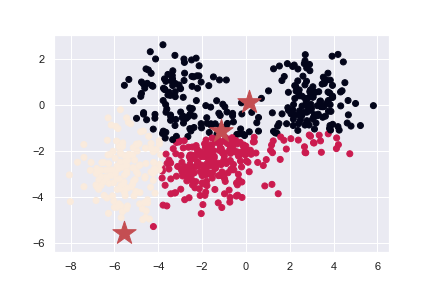
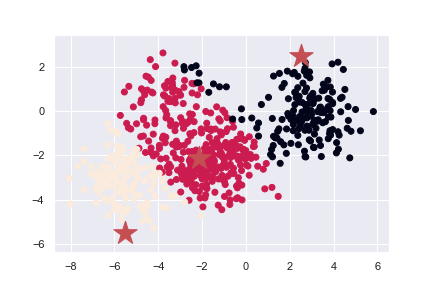
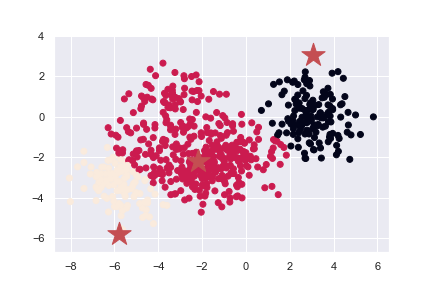
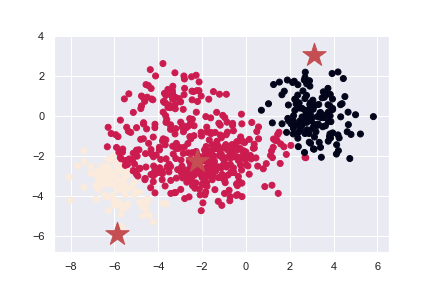
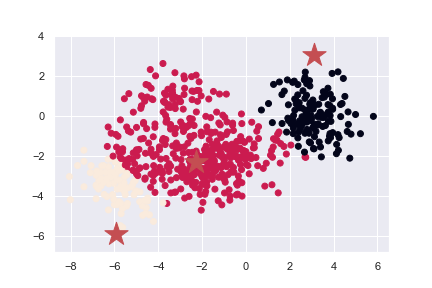
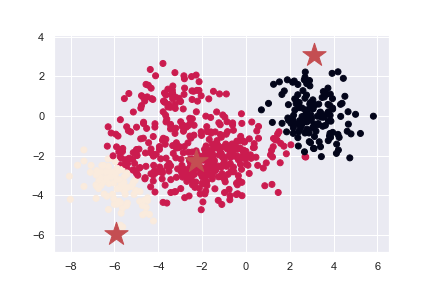
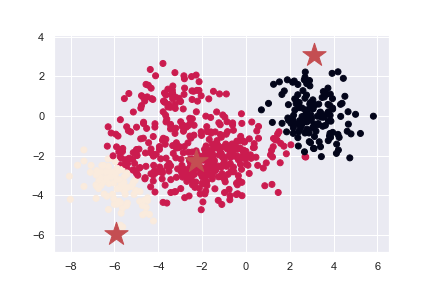
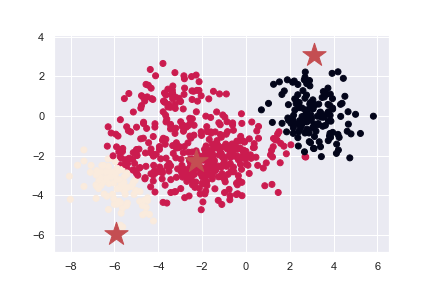
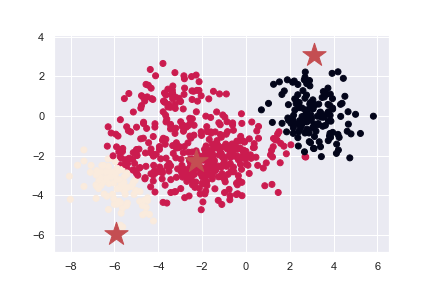
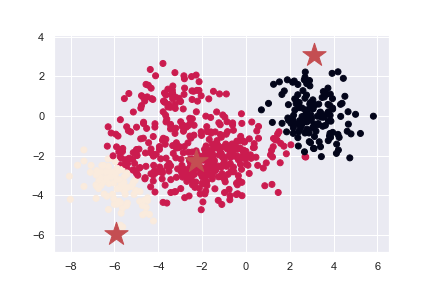
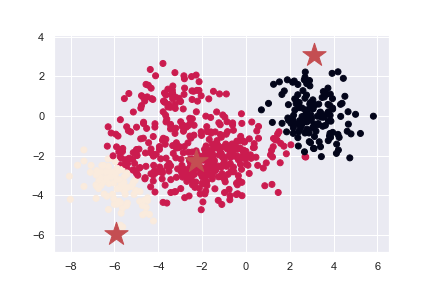
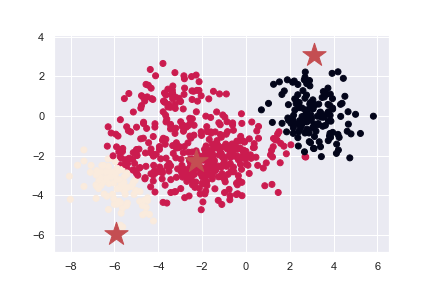
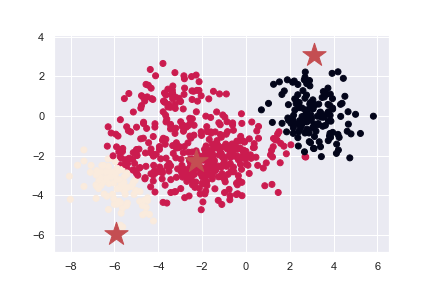
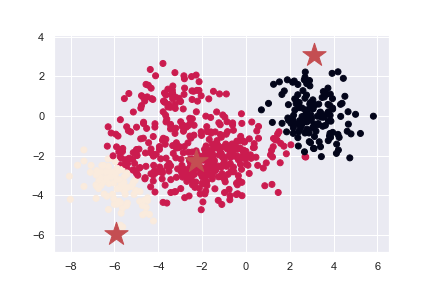
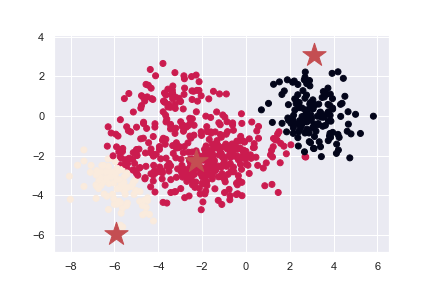

In [795]:
from JSAnimation import IPython_display
from matplotlib import animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = model.initialize_centroids()

line1, = ax.plot([], [], 'o')
line2, = ax.plot([], [], 'o')

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1,line2

def animate(i):
    global centroids
    closest = model.closest_centroid(centroids)
    centroids = model.move_centroids(centroids)
    ax.cla()
    ax.scatter(X[:, 0], X[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1],  marker='*', c='r', s=600)
    
    line1.set_data(X[:, 0] , X[:, 1])
    line2.set_data(centroids[:, 0] ,centroids[:, 1])
    return line1, line2

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=15, interval=150, blit=True)

## 5 - Finding Optimal Value of K

Now we can check if our value of k is right. Let's use "elbow" method to do this.

To find a visual “elbow” which is the optimal number of clusters, we need to calculate the average sum of squared distance between points and centroid inside of each cluster. Mathematically,
$$W_k = \frac{1}{k}\sum_{i=1}^{k} \sum_{j}^{n_s} ||x_{ij} - c_i||^2$$
Where $k$ is the number of clusters, $n_S$ is the number of points in cluster $S$.

Implement function to find $W_k$ in the cell below:

In [796]:
# GRADED FUNCTION: mean_distances

def mean_distances(k, X):
    """
    Arguments:
    
    k -- int, number of clusters
    X -- np.array, matrix of input features
    
    Returns:
    
    Array of shape (k, ), containing mean of sum distances 
        from centroid to each point in the cluster for k clusters
    """
    
    ### START CODE HERE ###
    mean_dist = []
    for n in range(1,k+1):
        model_next = KMeans(X, n)
        clusters, final_centrs = model_next.final_centroids()
        w = 0
        for clust, centr in zip(clusters, final_centrs):        
            for clust_n in clust:
                w += (np.linalg.norm(clust_n - centr))**2
        w = (1/n)*w
        mean_dist.append(w)
    return mean_dist
    ### END CODE HERE ###

In [797]:
print('Mean distances: ', mean_distances(10, X)) 

Mean distances:  [8357.669668621937, 3074.6152045604604, 1752.676730599421, 1628.6712214642237, 915.7391516467442, 915.4436130397116, 568.3594822035433, 630.8050906793919, 600.0800630581281, 513.7286318148116]


**Expected Output**: 

<table>
    <tr>
        <td> **Mean distances:** </td>
       <td>[ 8350.90848673  1755.47187315   685.22919558   322.6593165    232.80018991
   160.19202207   126.99851263   101.4422168     77.38601548    64.55960047]</td>        
    </tr>
    
   
</table>

Let's plot the results:

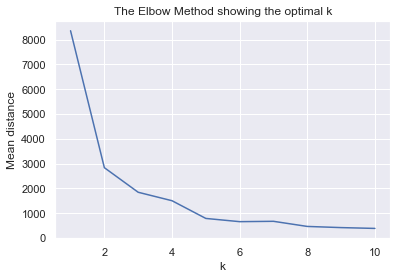

In [798]:
k_clusters = range(1, 11)
distances = mean_distances(10, X)
plt.plot(k_clusters, distances)
plt.xlabel('k')
plt.ylabel('Mean distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The plot shows that 3 is optimal value of k. But now we can also check performance of the algorithm with another values:


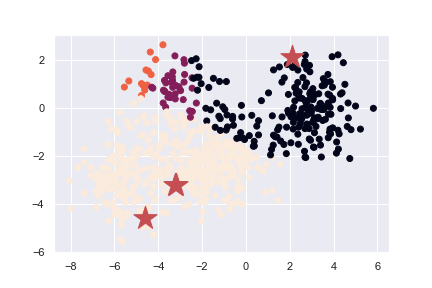
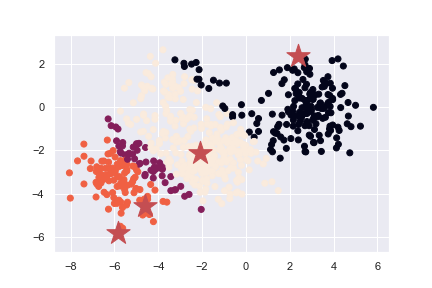
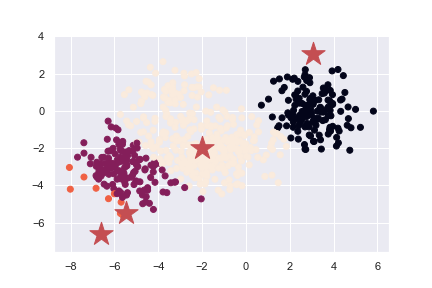
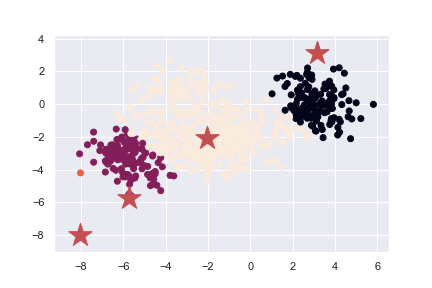
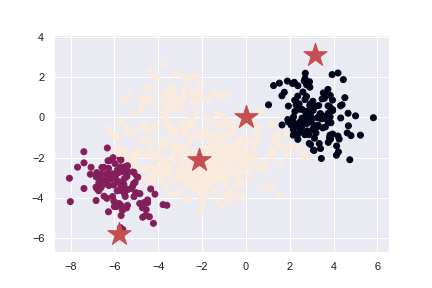
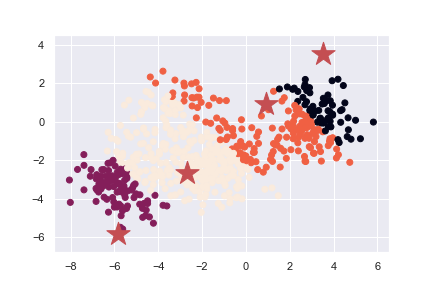
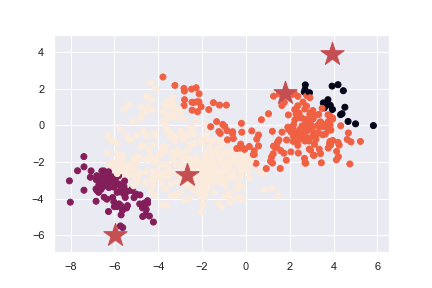
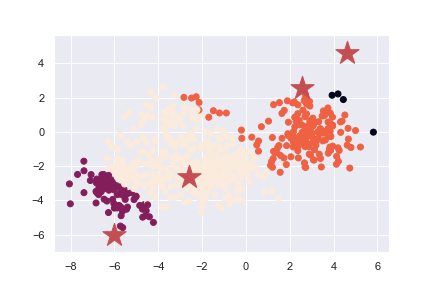
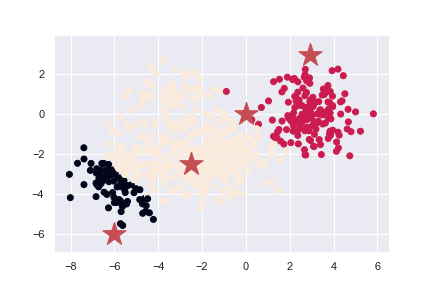
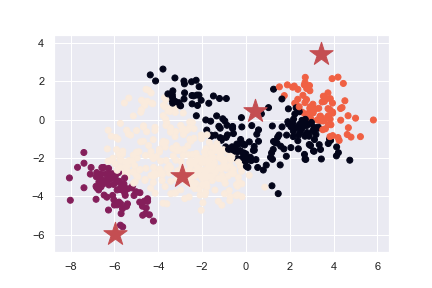
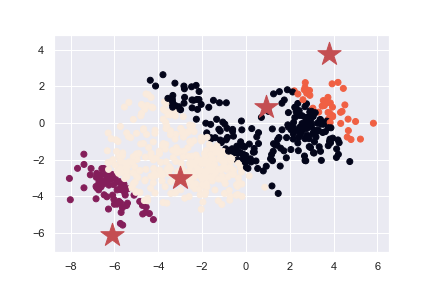
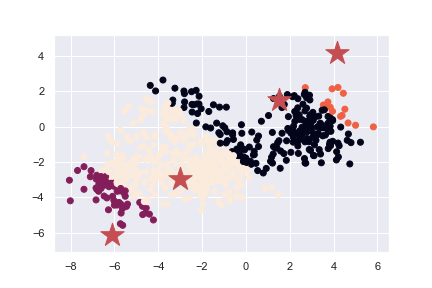
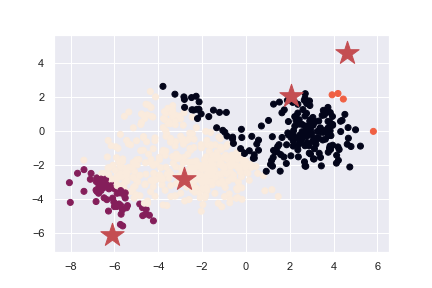
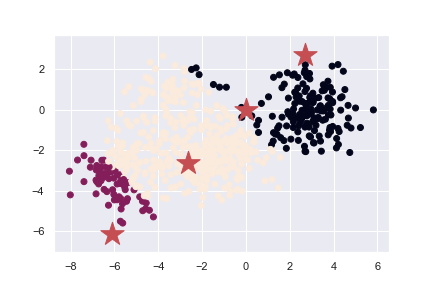
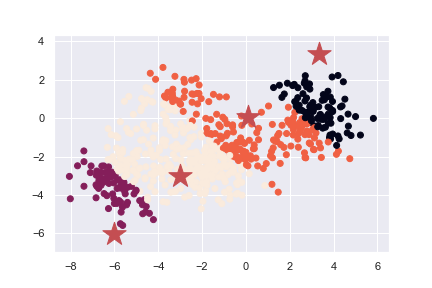
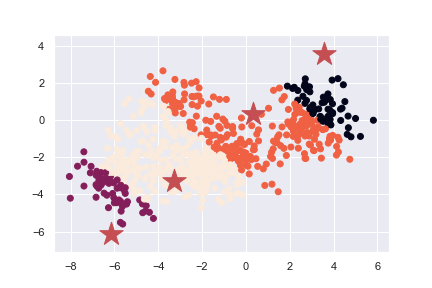
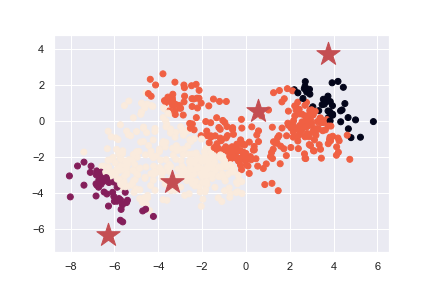
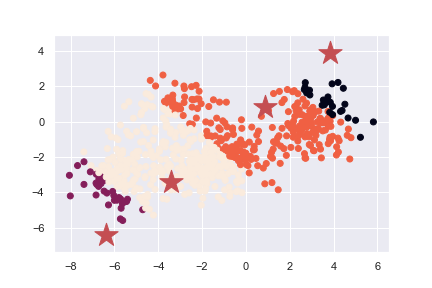
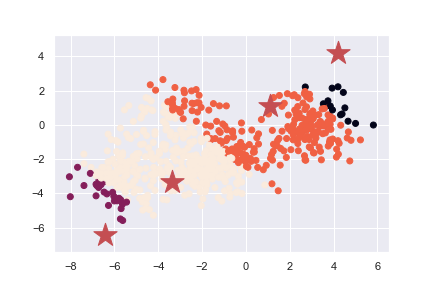
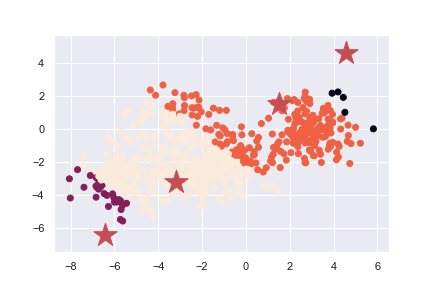
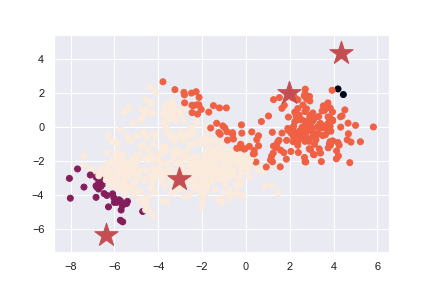
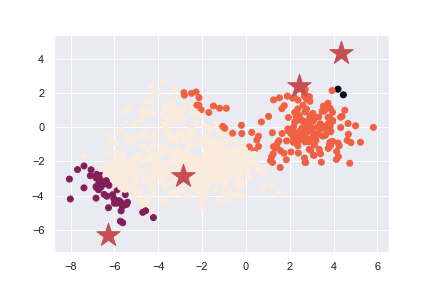
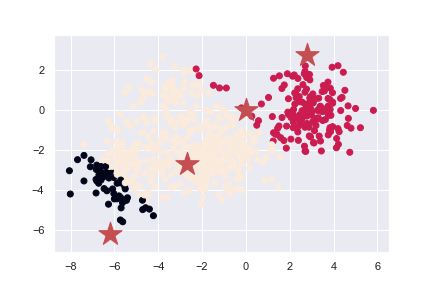
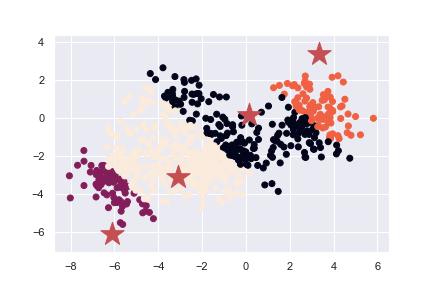
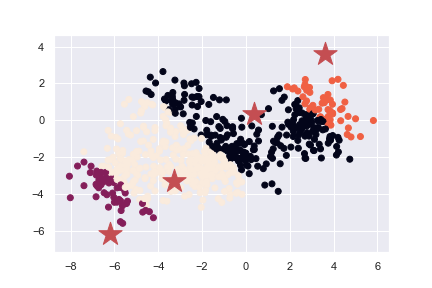
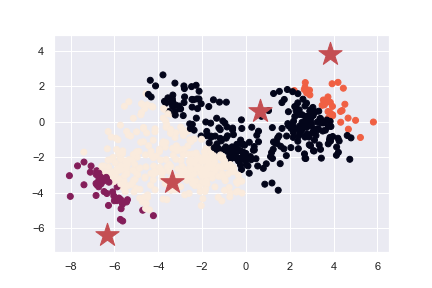
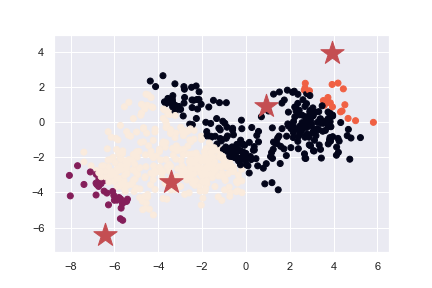
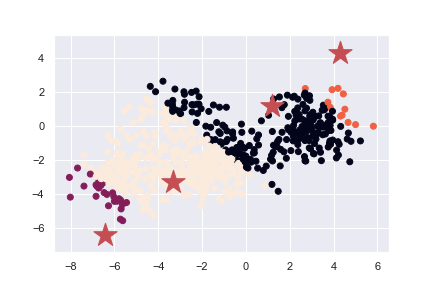
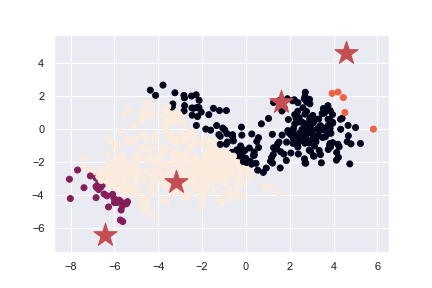
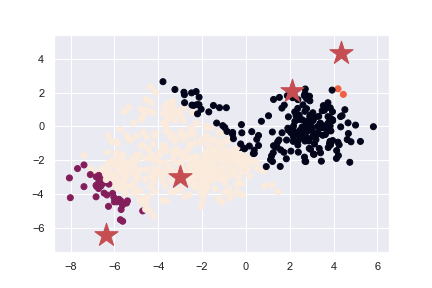

In [799]:
model_new = KMeans(X, 4)
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = model_new.initialize_centroids()

line1, = ax.plot([], [], 'o')
line2, = ax.plot([], [], 'o')

def init():
    
    line1.set_data([], [])
    line2.set_data([], [])
    return line1,line2

def animate(i):
    global centroids
    closest = model_new.closest_centroid(centroids)
    centroids = model_new.move_centroids(centroids)
    ax.cla()
    ax.scatter(X[:, 0], X[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1],  marker='*', c='r', s=600)
    line1.set_data(X[:, 0] , X[:, 1])
    line2.set_data(centroids[:, 0] ,centroids[:, 1])
    return line1, line2

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=30, interval=200, blit=True)

## 6 - Conclusion
As we can see, our model performs the task correctly.

#### What's next:
1. Compare the results you have obtained with the `sklearn.cluster.KMeans` models.
3. Try this model in the wild! Select your favorite dataset [here](https://www.kaggle.com/datasets?sortBy=hottest&group=public&page=1&pageSize=20&size=small&filetype=all&license=all&tagids=13303) and play with it.